In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

In [2]:
train_dir = './clean-dataset/train'
validation_dir = './clean-dataset/validation'
image_size = 224

# 전이학습
## Experiment 1: Freezing all layers - Same as Transfer Learning
모든 특징 추출을(학습을) 프리징  
뒤의 dense 2개만 trainable (cuz we let the set false)

### Create the model  

In [12]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)  #sequential이니까 불러온 모델 뒤에 레이어 붙어

# Add new layers
model.add(layers.Flatten())
#model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x000001ED80333E88> False
<keras.layers.convolutional.Conv2D object at 0x000001ED8033A9C8> False
<keras.layers.convolutional.Conv2D object at 0x000001ED8033A248> False
<keras.layers.pooling.MaxPooling2D object at 0x000001EDB61957C8> False
<keras.layers.convolutional.Conv2D object at 0x000001ED80348DC8> False
<keras.layers.convolutional.Conv2D object at 0x000001ED80380448> False
<keras.layers.pooling.MaxPooling2D object at 0x000001ED80396E48> False
<keras.layers.convolutional.Conv2D object at 0x000001ED8039FE08> False
<keras.layers.convolutional.Conv2D object at 0x000001ED803D1488> False
<keras.layers.convolutional.Conv2D object at 0x000001ED803E4848> False
<keras.layers.pooling.MaxPooling2D object at 0x000001ED80409BC8> False
<keras.layers.convolutional.Conv2D object at 0x000001ED8041D208> False
<keras.layers.convolutional.Conv2D object at 0x000001ED80440848> False
<keras.layers.convolutional.Conv2D object at 0x000001ED80458C08> False
<ker

### Train the model

In [16]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 50 #100은 무리라서
val_batchsize = 10 #는 큰 의미 없지만

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [17]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/5
12/12 [==============================] - 53s 4s/step - loss: 0.2562 - acc: 0.8850 - val_loss: 0.3843 - val_acc: 0.8800
Epoch 2/5
12/12 [==============================] - 55s 5s/step - loss: 0.2499 - acc: 0.8783 - val_loss: 0.3336 - val_acc: 0.8933
Epoch 3/5
12/12 [==============================] - 55s 5s/step - loss: 0.2093 - acc: 0.9033 - val_loss: 0.3634 - val_acc: 0.8733
Epoch 4/5
12/12 [==============================] - 55s 5s/step - loss: 0.1773 - acc: 0.9083 - val_loss: 0.3222 - val_acc: 0.8800
Epoch 5/5
12/12 [==============================] - 55s 5s/step - loss: 0.1763 - acc: 0.9300 - val_loss: 0.3890 - val_acc: 0.9000


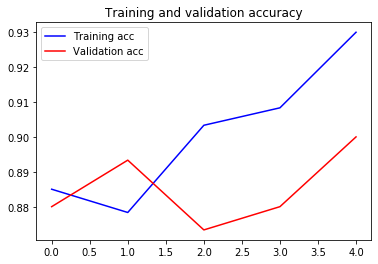

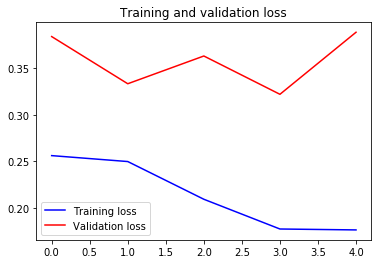

In [20]:
# Save the Model
model.save('all_freezed_dense1024to64.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 하위 몇 레벨만 프리징

In [26]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)  #sequential이니까 불러온 모델 뒤에 레이어 붙어

# Add new layers
model.add(layers.Flatten())
#model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x000001ED8150F588> False
<keras.layers.convolutional.Conv2D object at 0x000001ED8150F3C8> False
<keras.layers.convolutional.Conv2D object at 0x000001ED814669C8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001ED81520188> False
<keras.layers.convolutional.Conv2D object at 0x000001ED80A58048> False
<keras.layers.convolutional.Conv2D object at 0x000001ED815691C8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001ED815776C8> False
<keras.layers.convolutional.Conv2D object at 0x000001ED8157FBC8> False
<keras.layers.convolutional.Conv2D object at 0x000001ED815A1EC8> False
<keras.layers.convolutional.Conv2D object at 0x000001ED815C3808> False
<keras.layers.pooling.MaxPooling2D object at 0x000001ED815E77C8> False
<keras.layers.convolutional.Conv2D object at 0x000001ED815FF408> False
<keras.layers.convolutional.Conv2D object at 0x000001ED81613D08> False
<keras.layers.convolutional.Conv2D object at 0x000001EDB9497108> False
<ker

In [27]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 50 #100은 무리라서
val_batchsize = 10 #는 큰 의미 없지만

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [28]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/50
12/12 [==============================] - 65s 5s/step - loss: 9.5984 - acc: 0.3367 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 2/50
12/12 [==============================] - 67s 6s/step - loss: 10.7454 - acc: 0.3333 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 3/50
12/12 [==============================] - 66s 6s/step - loss: 10.6648 - acc: 0.3383 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 4/50
12/12 [==============================] - 66s 5s/step - loss: 10.6917 - acc: 0.3367 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 5/50
12/12 [==============================] - 66s 5s/step - loss: 10.5574 - acc: 0.3450 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 6/50
12/12 [==============================] - 67s 6s/step - loss: 10.6917 - acc: 0.3367 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 7/50
12/12 [==============================] - 69s 6s/step - loss: 10.7723 - acc: 0.3317 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 8/50
12/12 [==============================] - 66s 5s/step - loss: 10.79